In [174]:
import boto3

In [175]:
import pandas as pd
from io import StringIO

In [176]:
# Set up S3 client
client = boto3.client('s3')

In [177]:
bucket_name = 'viamericas-datalake-dev-us-east-1-283731589572-analytics'
path = 'Forecast/Forecast_analysis/forecast_7d_10_09_2023/' # Folder under analysis

In [178]:
# Listing objects 
elements = client.list_objects(Bucket=bucket_name, Prefix=path)

In [179]:
# Initialize an empty list 
dfs = []

In [180]:
# Iterate through each CSV in the S3 path
for obj in elements.get('Contents', []):
#    print(obj)
    # Check if the object is a CSV file
    if obj['Key'].endswith('.csv'):
        # Read CSV content from S3
        response = client.get_object(Bucket=bucket_name, Key=obj['Key'])
        print(obj['Key'])
        csv_content = response['Body'].read().decode('utf-8')

        # Transform CSV content to df
        df = pd.read_csv(StringIO(csv_content))

        dfs.append(df)

Forecast/Forecast_analysis/forecast_7d_10_09_2023/forecast_7d_10_09_2023_2024-01-17T20-56-53Z_part0.csv
Forecast/Forecast_analysis/forecast_7d_10_09_2023/forecast_7d_10_09_2023_2024-01-17T20-56-53Z_part1.csv
Forecast/Forecast_analysis/forecast_7d_10_09_2023/forecast_7d_10_09_2023_2024-01-17T20-56-53Z_part10.csv
Forecast/Forecast_analysis/forecast_7d_10_09_2023/forecast_7d_10_09_2023_2024-01-17T20-56-53Z_part11.csv
Forecast/Forecast_analysis/forecast_7d_10_09_2023/forecast_7d_10_09_2023_2024-01-17T20-56-53Z_part12.csv
Forecast/Forecast_analysis/forecast_7d_10_09_2023/forecast_7d_10_09_2023_2024-01-17T20-56-53Z_part13.csv
Forecast/Forecast_analysis/forecast_7d_10_09_2023/forecast_7d_10_09_2023_2024-01-17T20-56-53Z_part14.csv
Forecast/Forecast_analysis/forecast_7d_10_09_2023/forecast_7d_10_09_2023_2024-01-17T20-56-53Z_part15.csv
Forecast/Forecast_analysis/forecast_7d_10_09_2023/forecast_7d_10_09_2023_2024-01-17T20-56-53Z_part16.csv
Forecast/Forecast_analysis/forecast_7d_10_09_2023/forecas

In [181]:
final_df = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_550/3658546852.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat(dfs, ignore_index=True)


In [182]:
final_df['date'] = pd.to_datetime(final_df['date']).dt.date

In [183]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  910 non-null    object 
 1   country  910 non-null    object 
 2   payer    910 non-null    object 
 3   date     910 non-null    object 
 4   p10      910 non-null    float64
 5   p50      910 non-null    float64
 6   p90      910 non-null    float64
 7   mean     910 non-null    float64
dtypes: float64(4), object(4)
memory usage: 57.0+ KB


In [184]:
final_df['item_id'].nunique()

130

In [185]:
final_df.payer.unique()

array(['walmart (ut)', 'metrobank', 'transferto - thunes',
       'caribe express', 'tigo money', 'envios con clabe (appriza)',
       'global envios', 'nafa', 'zeepay', 'banco ganadero (bolivia)',
       'caja popular mexicana (ut)', 'g y t continental', 'lafise',
       'merchantrade', 'elektra (bts)', 'mastercard atm network',
       'promerica (gua)', 'banco agricola', 'yes bank', 'banco daycoval',
       'bancolombia', 'gme', 'transpay', 'airpak', 'credomatic (bts)',
       'soriana', 'speed money', 'intermex', 'kori', 'jmmb',
       'bank of philippine islands (bpi)', 'fedecredito (ryt)',
       'banco popular honduras (ut)', 'farmacias del ahorro (datransfer)',
       'interbank', 'banco industrial els (red chapina)', 'argenper',
       'vtn', 'bancoppel (appriza)', 'msbb money', '24xoro',
       'envicon (anteriormente envios confianza)', 'abank (tn)',
       'banco bhd leon', 'banco de oro (bdo)', 'banco industrial',
       'banco de guayaquil', 'cooperativa fronteriza (ut)',


In [186]:
final_df.head()

,item_id,country,payer,date,p10,p50,p90,mean
0,125,mexico,walmart (ut),2023-09-11,393637.25000,436419.93750,478903.8125,438100.37500
1,125,mexico,walmart (ut),2023-09-12,303080.09375,358782.59375,397113.2500,354355.03125
2,125,mexico,walmart (ut),2023-09-13,292125.25000,330895.43750,367172.9375,331902.03125
3,125,mexico,walmart (ut),2023-09-14,324715.12500,358750.06250,407178.0000,362068.87500
4,125,mexico,walmart (ut),2023-09-15,534412.81250,589636.75000,654287.0625,593470.50000


In [187]:
final_df.country.unique()

array(['mexico', 'philippines', 'spain', 'dominican republic',
       'el salvador', 'ecuador', 'guinea', "cote d'ivoire (ivory coast)",
       'bolivia', 'guatemala', 'nicaragua', 'indonesia', 'united states',
       'gambia, the', 'india', 'brazil', 'colombia', 'nepal', 'senegal',
       'burkina faso', 'jamaica', 'cameroon', 'honduras', 'peru', 'chile',
       'togo', 'italy', 'nigeria', 'united kingdom', 'bangladesh',
       'liberia', 'argentina', 'france', 'sierra leone', 'belgium',
       'haiti', 'united states (atm & deposits)', 'portugal', 'benin',
       'thailand', 'mali', 'malaysia', 'germany', 'uruguay', 'costa rica',
       'ghana'], dtype=object)

In [188]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
final_df['payer_country'] = final_df['payer'] + '_' + final_df['country']

In [189]:
final_df['payer_country'].nunique()

130

In [190]:
final_df.country.nunique()

46

In [191]:
final_df['date'] = pd.to_datetime(final_df['date'])

In [192]:
##TOP 10 FORECAST AMOUNTS BETWEEN 11/09/2023 AND 17/09/2023##
total_amount_per_payer =final_df.groupby('payer_country')['mean'].sum()
top_10_payers = total_amount_per_payer.sort_values(ascending=False).head(10)
print(top_10_payers)

payer_country
elektra (mexico)_mexico                 6.948881e+07
bancoppel (appriza)_mexico              4.355805e+07
banrural (ryt)_guatemala                3.265410e+07
banco industrial_guatemala              2.311325e+07
envios con clabe (appriza)_mexico       8.993653e+06
bbva - bancomer (bts)_mexico            6.836256e+06
banorte (ut)_mexico                     4.867944e+06
banco de occidente_honduras             4.549735e+06
telecomm telegrafos (appriza)_mexico    4.458677e+06
banco atlantida_honduras                4.431003e+06
Name: mean, dtype: float64


In [193]:
##TIME INTERVAL FORECAST##
final_df.date.min(),final_df.date.max(),

(Timestamp('2023-09-11 00:00:00'), Timestamp('2023-09-17 00:00:00'))

In [194]:
final_df['mean'].sum()

272391217.38494086

In [195]:
control=final_df.loc[final_df.country=='mexico']

In [196]:
control['mean'].sum()

149524066.84303623

In [197]:
pip install pyathena


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [198]:
from pyathena import connect

In [199]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name= 'analytics'
table_name = 'daily_check'

In [200]:
#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)

/tmp/ipykernel_550/3276710735.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)


In [201]:
df_check['date'] = pd.to_datetime(df_check['date'])

In [202]:
df_check.head()

,payer,country,date,tx,amount,coupon_count
0,BANCO AGRICOLA,EL SALVADOR,2021-06-17,707,198615.00,316
1,ECUAGIROS,ECUADOR,2022-06-27,144,106780.51,3
2,BANCO BISA,BOLIVIA,2023-07-04,8,3650.00,0
3,COOPERATIVA FRONTERIZA (UT),HONDURAS,2022-07-28,29,12747.00,1
4,CHEDRAUI (APPRIZA),MEXICO,2021-06-17,32,17128.00,12


In [203]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101970 entries, 0 to 101969
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   payer         101970 non-null  object        
 1   country       101970 non-null  object        
 2   date          101970 non-null  datetime64[ns]
 3   tx            101970 non-null  int64         
 4   amount        101970 non-null  float64       
 5   coupon_count  101970 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 4.7+ MB


In [204]:
df_check=df_check.loc[(df_check.date>'2023-09-10') & (df_check.date<'2023-09-18')]

In [205]:
df_check.date.min(),df_check.date.max()

(Timestamp('2023-09-11 00:00:00'), Timestamp('2023-09-17 00:00:00'))

In [206]:
df_check.head()

,payer,country,date,tx,amount,coupon_count
190,DAVIVIENDA - HONDURAS (BTS),HONDURAS,2023-09-16,18,14144.0,0
278,MERCHANTRADE,MALAYSIA,2023-09-17,1,400.0,0
454,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-09-17,20,9902.0,0
1006,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-12,4,967.0,0
1081,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-09-13,6,2820.0,0


In [207]:
df_check.country.nunique()

46

In [208]:
df_check.payer.nunique()

102

In [209]:
df_check.amount.sum()

237921126.79000002

In [210]:
control2=df_check.loc[df_check.country=='MEXICO']

In [211]:
control2.amount.sum()

124849087.73

In [212]:
df_check.country.unique()

array(['HONDURAS', 'MALAYSIA', 'MEXICO', 'GUINEA', 'BURKINA FASO',
       'PORTUGAL', 'TOGO', 'PHILIPPINES', 'GAMBIA, THE',
       "COTE D'IVOIRE (IVORY COAST)", 'PERU', 'CAMEROON', 'GERMANY',
       'ARGENTINA', 'ECUADOR', 'COLOMBIA', 'GHANA', 'INDONESIA', 'CHILE',
       'BANGLADESH', 'EL SALVADOR', 'BOLIVIA', 'LIBERIA', 'SENEGAL',
       'JAMAICA', 'GUATEMALA', 'SPAIN', 'NIGERIA', 'SIERRA LEONE',
       'NICARAGUA', 'UNITED STATES (ATM & DEPOSITS)', 'MALI', 'BRAZIL',
       'DOMINICAN REPUBLIC', 'COSTA RICA', 'HAITI', 'UNITED STATES',
       'NEPAL', 'INDIA', 'THAILAND', 'SRI LANKA', 'ITALY', 'BELGIUM',
       'FRANCE', 'BENIN', 'UNITED KINGDOM'], dtype=object)

In [213]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_check['payer_country'] = df_check['payer'] + '_' + df_check['country']

In [214]:
##TOP 10 DAILY_CHECK AMOUNTS BETWEEN 21/03/2023 AND 28/03/2023##
total_amount_per_payer2 =df_check.groupby('payer_country')['amount'].sum()
top_10_payers2 = total_amount_per_payer2.sort_values(ascending=False).head(10)
print(top_10_payers2)

payer_country
ELEKTRA (MEXICO)_MEXICO              58489977.24
BANCOPPEL (APPRIZA)_MEXICO           36173799.42
BANRURAL (RYT)_GUATEMALA             28839474.42
BANCO INDUSTRIAL_GUATEMALA           21640581.87
ENVIOS CON CLABE (APPRIZA)_MEXICO     7756093.18
BBVA - BANCOMER (BTS)_MEXICO          5479860.80
BANCO DE OCCIDENTE_HONDURAS           4346229.33
BANORTE (UT)_MEXICO                   3923831.91
BANCO ATLANTIDA_HONDURAS              3919080.09
BANPRO_NICARAGUA                      3371673.93
Name: amount, dtype: float64


In [215]:
final_df.country.unique()

array(['mexico', 'philippines', 'spain', 'dominican republic',
       'el salvador', 'ecuador', 'guinea', "cote d'ivoire (ivory coast)",
       'bolivia', 'guatemala', 'nicaragua', 'indonesia', 'united states',
       'gambia, the', 'india', 'brazil', 'colombia', 'nepal', 'senegal',
       'burkina faso', 'jamaica', 'cameroon', 'honduras', 'peru', 'chile',
       'togo', 'italy', 'nigeria', 'united kingdom', 'bangladesh',
       'liberia', 'argentina', 'france', 'sierra leone', 'belgium',
       'haiti', 'united states (atm & deposits)', 'portugal', 'benin',
       'thailand', 'mali', 'malaysia', 'germany', 'uruguay', 'costa rica',
       'ghana'], dtype=object)

In [216]:
final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

/tmp/ipykernel_550/2399063668.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


In [217]:
final_df.country.unique()

array(['MEXICO', 'PHILIPPINES', 'SPAIN', 'DOMINICAN REPUBLIC',
       'EL SALVADOR', 'ECUADOR', 'GUINEA', "COTE D'IVOIRE (IVORY COAST)",
       'BOLIVIA', 'GUATEMALA', 'NICARAGUA', 'INDONESIA', 'UNITED STATES',
       'GAMBIA, THE', 'INDIA', 'BRAZIL', 'COLOMBIA', 'NEPAL', 'SENEGAL',
       'BURKINA FASO', 'JAMAICA', 'CAMEROON', 'HONDURAS', 'PERU', 'CHILE',
       'TOGO', 'ITALY', 'NIGERIA', 'UNITED KINGDOM', 'BANGLADESH',
       'LIBERIA', 'ARGENTINA', 'FRANCE', 'SIERRA LEONE', 'BELGIUM',
       'HAITI', 'UNITED STATES (ATM & DEPOSITS)', 'PORTUGAL', 'BENIN',
       'THAILAND', 'MALI', 'MALAYSIA', 'GERMANY', 'URUGUAY', 'COSTA RICA',
       'GHANA'], dtype=object)

In [218]:
df_forecast = pd.merge(df_check, final_df, on=['date','payer','country'], how='outer', indicator=True)

In [219]:
df_forecast._merge.value_counts()

_merge
both          739
right_only    171
left_only      59
Name: count, dtype: int64

In [220]:
control3=df_forecast.loc[df_forecast._merge=='left_only']
control3.payer.unique()

array(['BNB', 'EXPIRED ORDERS', 'MFS AFRICA', 'ATLANTIDA (ELS) (UT)',
       'NAFA', 'MUTHOOT', 'MERCHANTRADE', 'TRANSPAY', 'WOOLWORTH (UT)',
       'VIAMERICAS USA DEPOSITS (RT)'], dtype=object)

In [221]:
control4=df_forecast.loc[df_forecast._merge=='right_only']
control4.payer.unique()

array(['TIGO MONEY', 'ZEEPAY', 'CAJA POPULAR MEXICANA (UT)', 'NAFA',
       'TRANSPAY', 'KORI', 'JMMB', 'FARMACIAS DEL AHORRO (DATRANSFER)',
       'BANCO INDUSTRIAL ELS (RED CHAPINA)', 'TRANSFERTO - THUNES', 'VTN',
       'M. LHUILLIER', 'ARGENPER', 'AFRO INTERNACIONAL',
       'MASTERCARD ATM NETWORK', 'MUTHOOT-BANGLADESH', 'BNB',
       'CHEDRAUI (APPRIZA)', 'MERCHANTRADE', 'VIAMERICAS USA DEPOSITS',
       'AFEX'], dtype=object)

In [222]:
##ESTO SE NOS ESTARÍAMOS PERDIENDO EN 200 MILLONES (0.25%), ENCONTRAR DIFERENCIAS LUEGO, POR AHORA AVANZAR EN MAPES##
## CUIDADO QUE PUEDE SUCEDER TAMBIEN QUE LOS PAYERS PEQUEÑOS, NO OPEREN AGÚN DIA Y ESO EXPLIQUE QUE NO HAYA MERGE PERFECTO##
control4['mean'].sum()

233175.64941993728

In [223]:
control4.country.unique()

array(['EL SALVADOR', "COTE D'IVOIRE (IVORY COAST)", 'MEXICO',
       'GAMBIA, THE', 'SENEGAL', 'BURKINA FASO', 'JAMAICA', 'CAMEROON',
       'TOGO', 'ITALY', 'NIGERIA', 'UNITED KINGDOM', 'PHILIPPINES',
       'BANGLADESH', 'LIBERIA', 'BOLIVIA', 'ARGENTINA', 'FRANCE',
       'GUINEA', 'BELGIUM', 'UNITED STATES (ATM & DEPOSITS)',
       'SIERRA LEONE', 'BENIN', 'THAILAND', 'MALI', 'MALAYSIA', 'GERMANY',
       'INDONESIA', 'URUGUAY'], dtype=object)

In [224]:
control5=df_forecast.loc[df_forecast._merge=='both']
control5.payer.unique()

array(['DAVIVIENDA - HONDURAS (BTS)', 'MERCHANTRADE',
       'ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)',
       'BANCO POPULAR HONDURAS (UT)', 'NAFA', 'TRANSFERTO - THUNES',
       'BANK OF PHILIPPINE ISLANDS (BPI)', 'ZEEPAY', 'ARGENPER',
       'SPEED MONEY', 'GLOBAL ENVIOS', 'BANCO DE ORO (BDO)',
       'BANCO INDUSTRIAL ELS (RED CHAPINA)', 'JMMB', 'CEBUANA LHUILLIER',
       'BANTRAB (UT)', 'FARMACIAS DEL AHORRO (DATRANSFER)',
       'PROMERICA (GUA)', 'MUTHOOT-BANGLADESH', 'BNB',
       'BANCO GANADERO (BOLIVIA)', 'DEPOSITOS BANCARIOS GUATEMALA - ACH',
       'TRANSPAY', 'MASTERCARD ATM NETWORK',
       'BAM - BANCO AGROMERCANTIL (UT)', 'BANHCAFE',
       'COOPERATIVA FRONTERIZA (UT)', 'KORI', 'BANRURAL (HONDURAS)',
       'BANCO RENDIMENTO', 'EASY PAGOS', 'PROMERICA', 'BANCO ATLANTIDA',
       'BANCO BISA', 'TELECOMM TELEGRAFOS (APPRIZA)',
       'BANCO DE GUAYAQUIL', 'ELEKTRA (BTS)', 'BANCO BHD LEON',
       'INTERMEX', 'G Y T CONTINENTAL', 'FICOHSA',
       'BBVA - BANCOMER (BTS

In [225]:
#7% DIF A UNA SEMANA##
control5.amount.sum(), control5['mean'].sum()

(237918481.86999997, 272158041.73552096)

In [226]:
df_forecast.amount.sum()

237921126.79000002

In [227]:
##BANCO POPULAR HONDURAS (UT)en df_check#
control6= df_check.loc[df_check.payer=='BANCO POPULAR HONDURAS (UT)']
control6.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country
1006,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-12,4,967.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
11159,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-11,0,0.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
35983,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-14,2,720.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
50915,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-16,5,1984.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
76234,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-15,1,192.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
78518,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-17,5,2890.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
79962,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-13,3,640.0,0,BANCO POPULAR HONDURAS (UT)_HONDURAS


In [228]:
##BANCO POPULAR HONDURAS (UT)en df_forecast#
control7= df_forecast.loc[df_forecast.payer=='BANCO POPULAR HONDURAS (UT)']
control7.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country_x,item_id,p10,p50,p90,mean,payer_country_y,_merge
3,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-12,4.0,967.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,27.0,94.990707,918.081476,2085.731074,994.528731,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
69,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-11,0.0,0.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,27.0,-110.544306,761.379099,2005.748500,878.317053,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
287,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-14,2.0,720.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,27.0,-33.810217,744.516851,1685.274090,805.529411,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
396,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-16,5.0,1984.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,27.0,289.955708,1086.646318,2311.575036,1192.419666,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
573,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-15,1.0,192.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,27.0,226.499988,1085.429552,2393.159262,1186.059430,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
588,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-17,5.0,2890.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,27.0,444.539050,1237.909745,2447.169943,1373.870314,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
606,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-13,3.0,640.0,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,27.0,59.537363,895.214103,2078.782091,1012.187841,BANCO POPULAR HONDURAS (UT)_HONDURAS,both


In [229]:
##LA DIFERENCIAS SE EXPLICAN PORQUE LOS PAYERS PEQUEÑOS NO OPERAN TODOS LOS DIAS Y FORECAST LANZA UN PRONOSTICO A 7D (IMPUTAR ESOS DIAS)

In [230]:
df_forecast=df_forecast.loc[df_forecast._merge!='left_only']

In [231]:
df_forecast.amount.fillna(0, inplace=True)
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, 0 to 968
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   payer            910 non-null    object        
 1   country          910 non-null    object        
 2   date             910 non-null    datetime64[ns]
 3   tx               739 non-null    float64       
 4   amount           910 non-null    float64       
 5   coupon_count     739 non-null    float64       
 6   payer_country_x  739 non-null    object        
 7   item_id          910 non-null    float64       
 8   p10              910 non-null    float64       
 9   p50              910 non-null    float64       
 10  p90              910 non-null    float64       
 11  mean             910 non-null    float64       
 12  payer_country_y  910 non-null    object        
 13  _merge           910 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(8), 

In [232]:
df_forecast_final=df_forecast.loc[:, ['payer','country','date','amount','p10','p50','p90','mean']]

In [233]:
df_forecast_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 910 entries, 0 to 968
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   payer    910 non-null    object        
 1   country  910 non-null    object        
 2   date     910 non-null    datetime64[ns]
 3   amount   910 non-null    float64       
 4   p10      910 non-null    float64       
 5   p50      910 non-null    float64       
 6   p90      910 non-null    float64       
 7   mean     910 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 64.0+ KB


In [234]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_forecast_final['payer_country'] = df_forecast_final['payer'] + '_' + df_forecast_final['country']

In [235]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,DAVIVIENDA - HONDURAS (BTS),HONDURAS,2023-09-16,14144.0,6892.085869,9937.191787,12802.419977,9931.756709,DAVIVIENDA - HONDURAS (BTS)_HONDURAS
1,MERCHANTRADE,MALAYSIA,2023-09-17,400.0,-219.452777,21.729135,266.631251,28.743191,MERCHANTRADE_MALAYSIA
2,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-09-17,9902.0,2675.453317,4325.657355,6475.722462,4550.857143,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO
3,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-12,967.0,94.990707,918.081476,2085.731074,994.528731,BANCO POPULAR HONDURAS (UT)_HONDURAS
4,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-09-13,2820.0,2467.774811,3896.502513,5811.143390,4035.104710,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO


In [236]:
## MAPE A 1 DÍA POR PAYER##

In [237]:
##GENERAMOS EL ERROR DE PRONOSTICO##
##ELIMINAMOS LOS CASOS CON AMOUNT==0 PORQUE GENERA UNA INDETERMINACIÓN EN EL CÁLCULO (A/0=INF)
## Y SI IMPUTAMOS 1 EN VEZ DE CERO???###

In [238]:
## POR LO PRONTO ELIMINO LOS QUE TIENEN AMOUNT CERO Y EL MAPE ESTARÁ DEFINIDO BAJO ESA CONDICION##

In [241]:
df_forecast_final=df_forecast_final.loc[df_forecast_final.amount!=0]
df_forecast_final.shape

(722, 9)

In [242]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,DAVIVIENDA - HONDURAS (BTS),HONDURAS,2023-09-16,14144.0,6892.085869,9937.191787,12802.419977,9931.756709,DAVIVIENDA - HONDURAS (BTS)_HONDURAS
1,MERCHANTRADE,MALAYSIA,2023-09-17,400.0,-219.452777,21.729135,266.631251,28.743191,MERCHANTRADE_MALAYSIA
2,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-09-17,9902.0,2675.453317,4325.657355,6475.722462,4550.857143,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO
3,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-09-12,967.0,94.990707,918.081476,2085.731074,994.528731,BANCO POPULAR HONDURAS (UT)_HONDURAS
4,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-09-13,2820.0,2467.774811,3896.502513,5811.143390,4035.104710,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO


In [243]:
control=df_forecast_final.loc[df_forecast_final.country=='MEXICO']
control

,payer,country,date,amount,p10,p50,p90,mean,payer_country
2,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-09-17,9902.00,2.675453e+03,4.325657e+03,6.475722e+03,4.550857e+03,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO
4,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-09-13,2820.00,2.467775e+03,3.896503e+03,5.811143e+03,4.035105e+03,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO
45,FARMACIAS DEL AHORRO (DATRANSFER),MEXICO,2023-09-12,100.00,-1.558065e+01,3.617188e+01,1.230926e+02,4.624269e+01,FARMACIAS DEL AHORRO (DATRANSFER)_MEXICO
46,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA),MEXICO,2023-09-16,3326.00,2.295726e+03,3.774268e+03,5.839737e+03,3.951736e+03,ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)_MEXICO
65,FARMACIAS DEL AHORRO (DATRANSFER),MEXICO,2023-09-14,100.00,-3.515088e+01,5.270494e+01,1.424405e+02,5.025828e+01,FARMACIAS DEL AHORRO (DATRANSFER)_MEXICO
...,...,...,...,...,...,...,...,...,...
765,ENVIOS CON CLABE (APPRIZA),MEXICO,2023-09-13,765656.80,8.798716e+05,9.695931e+05,1.090650e+06,9.780524e+05,ENVIOS CON CLABE (APPRIZA)_MEXICO
777,24XORO,MEXICO,2023-09-14,34246.20,4.149582e+04,5.301106e+04,6.951848e+04,5.372432e+04,24XORO_MEXICO
784,OXXO (TN),MEXICO,2023-09-17,57229.50,4.216596e+04,5.565020e+04,6.591795e+04,5.454505e+04,OXXO (TN)_MEXICO
785,24XORO,MEXICO,2023-09-12,35689.24,3.218275e+04,4.289989e+04,5.470633e+04,4.240363e+04,24XORO_MEXICO


In [244]:
###MAPE FORECAST A 1 DÍA##
forecast_1d=df_forecast_final.loc[df_forecast_final.date=='2023-09-11']

In [245]:
forecast_1d.shape

(104, 9)

In [246]:
forecast_1d["pe"] = abs((forecast_1d.amount - forecast_1d['mean']) / forecast_1d.amount)

/tmp/ipykernel_550/2323064100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_1d["pe"] = abs((forecast_1d.amount - forecast_1d['mean']) / forecast_1d.amount)


In [247]:
forecast_1d.pe.min(), forecast_1d.pe.max()

(0.00484989055610552, 2.051195817589771)

In [248]:
forecast_1d.head(2)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
9,BANK OF PHILIPPINE ISLANDS (BPI),PHILIPPINES,2023-09-11,164217.41,82754.469886,101344.890027,120818.646161,100458.833331,BANK OF PHILIPPINE ISLANDS (BPI)_PHILIPPINES,0.388257
16,TRANSFERTO - THUNES,GERMANY,2023-09-11,222.51,-192.375946,98.608597,433.051208,89.467155,TRANSFERTO - THUNES_GERMANY,0.597918


In [249]:
forecast_1d.sort_values('amount', ascending=False).head(10)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
348,ELEKTRA (MEXICO),MEXICO,2023-09-11,8069372.31,8.872220e+06,9.456555e+06,1.003265e+07,9.452626e+06,ELEKTRA (MEXICO)_MEXICO,0.171420
152,BANCOPPEL (APPRIZA),MEXICO,2023-09-11,4652243.12,5.156468e+06,5.623953e+06,5.954824e+06,5.584666e+06,BANCOPPEL (APPRIZA)_MEXICO,0.200424
183,BANRURAL (RYT),GUATEMALA,2023-09-11,4334444.87,4.143648e+06,4.706376e+06,5.233092e+06,4.709053e+06,BANRURAL (RYT)_GUATEMALA,0.086426
224,BANCO INDUSTRIAL,GUATEMALA,2023-09-11,3252755.85,3.017895e+06,3.418188e+06,3.787699e+06,3.414477e+06,BANCO INDUSTRIAL_GUATEMALA,0.049718
154,ENVIOS CON CLABE (APPRIZA),MEXICO,2023-09-11,1079280.57,1.121309e+06,1.253769e+06,1.363908e+06,1.244704e+06,ENVIOS CON CLABE (APPRIZA)_MEXICO,0.153272
292,BBVA - BANCOMER (BTS),MEXICO,2023-09-11,844029.30,8.489666e+05,9.594748e+05,1.052105e+06,9.521199e+05,BBVA - BANCOMER (BTS)_MEXICO,0.128065
250,BANCO DE OCCIDENTE,HONDURAS,2023-09-11,709620.92,6.082987e+05,7.349192e+05,8.426807e+05,7.349192e+05,BANCO DE OCCIDENTE_HONDURAS,0.035650
110,G Y T CONTINENTAL,GUATEMALA,2023-09-11,606650.23,5.489641e+05,6.106793e+05,6.714532e+05,6.101651e+05,G Y T CONTINENTAL_GUATEMALA,0.005794
163,BANORTE (UT),MEXICO,2023-09-11,597375.97,6.252334e+05,7.104249e+05,7.821372e+05,7.048337e+05,BANORTE (UT)_MEXICO,0.179883
748,BANCO ATLANTIDA,HONDURAS,2023-09-11,536973.24,5.574565e+05,6.442676e+05,7.252731e+05,6.422544e+05,BANCO ATLANTIDA_HONDURAS,0.196064


In [250]:
##MAPE PROMEDIO A 1 D (para los que tienen MAPE definido)
forecast_1d.pe.mean()

0.3245061731776379

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


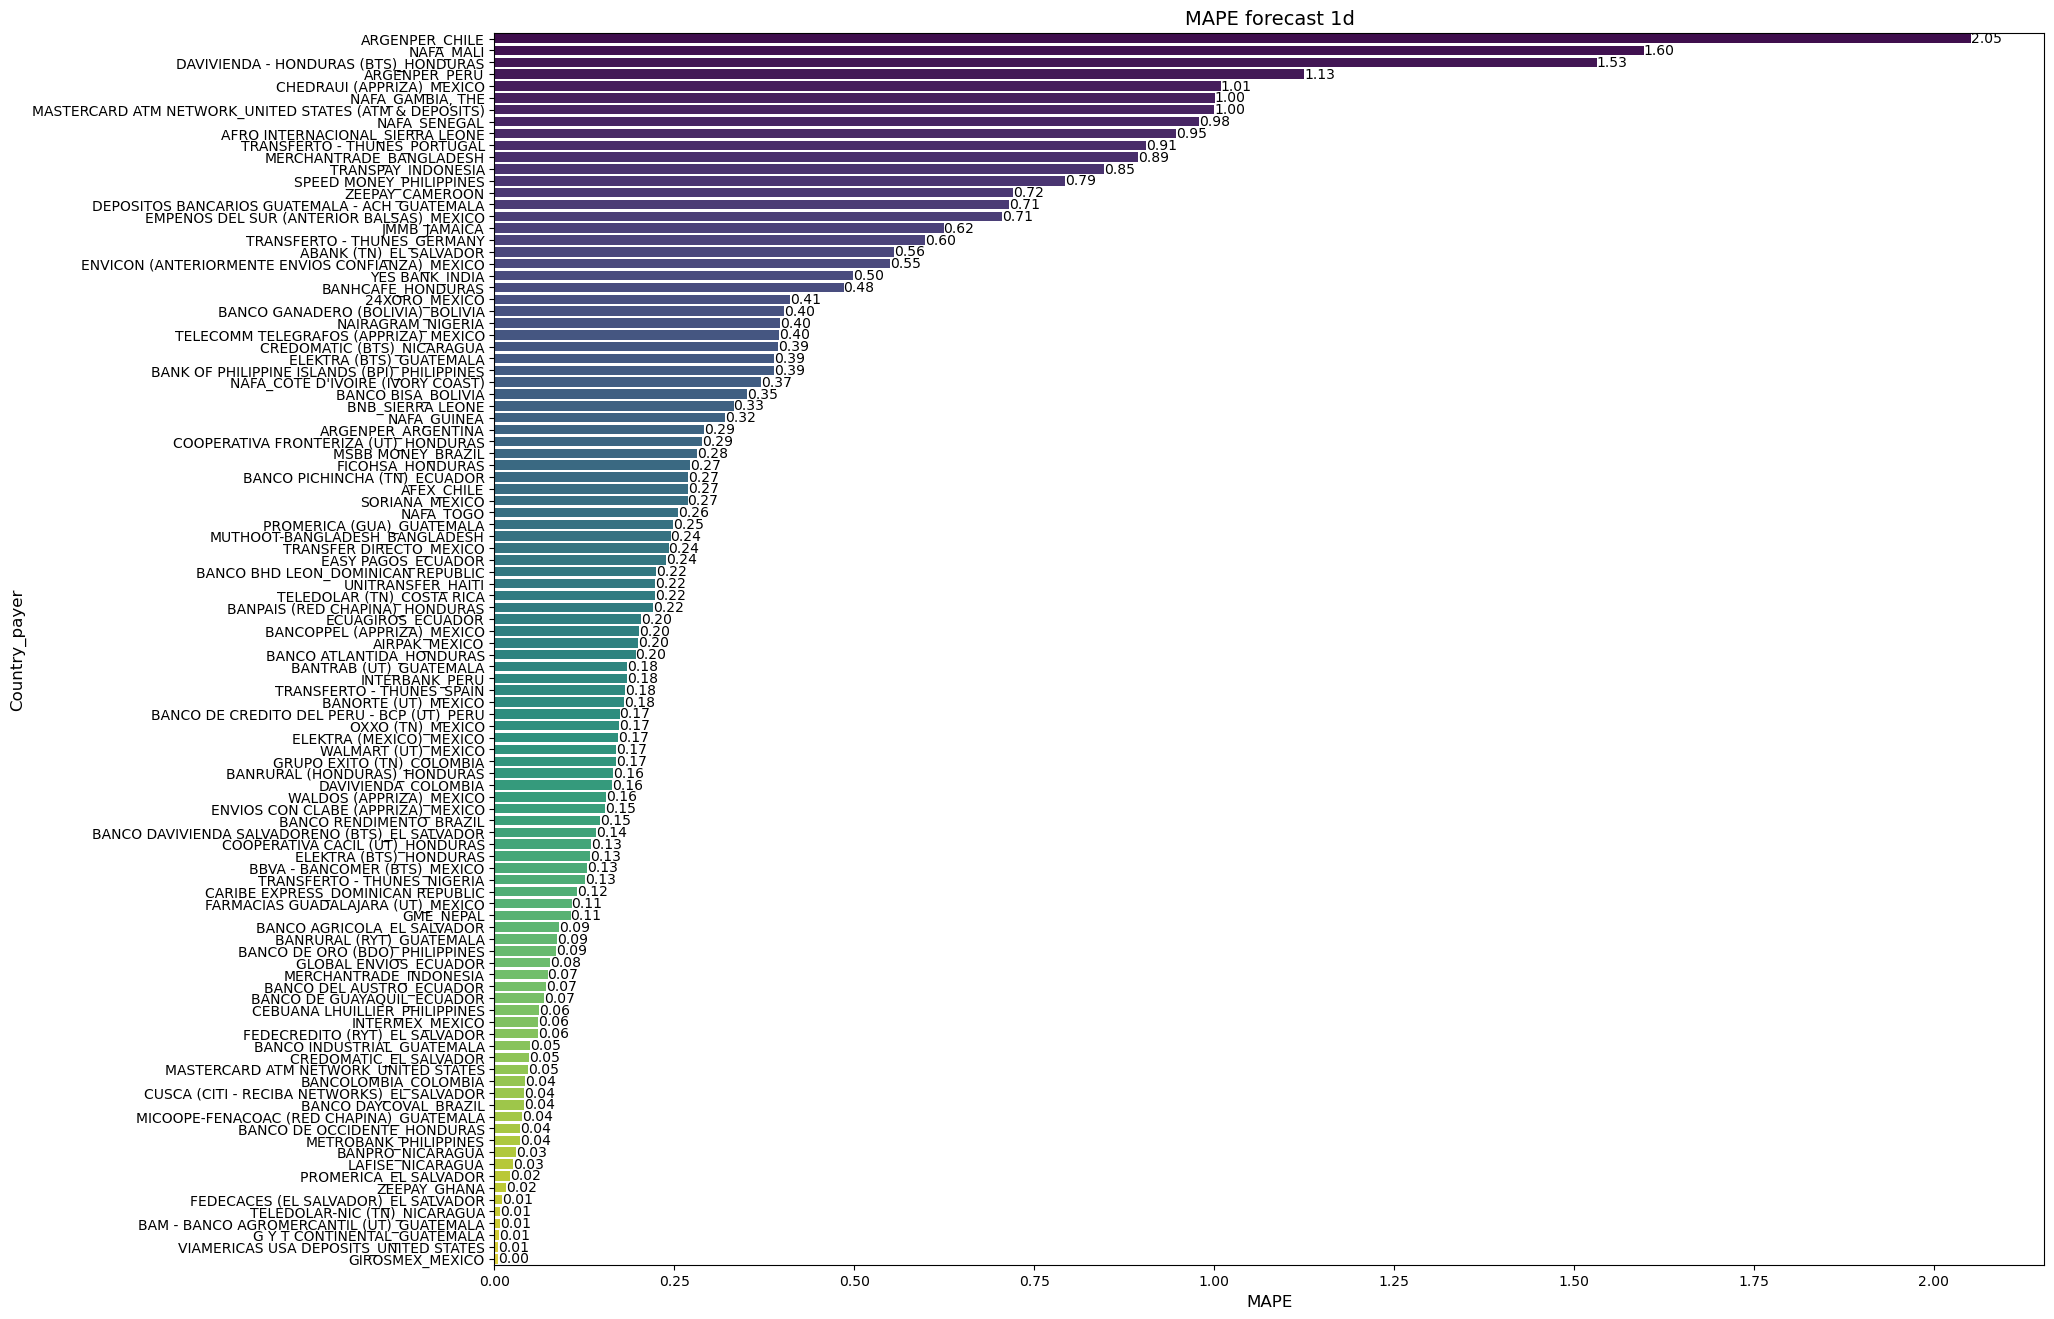

In [251]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

forecast_1d = forecast_1d.sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE forecast 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [252]:
##FORECAST 1D MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_1d_country = forecast_1d.groupby('country')['pe'].mean().reset_index()
forecast_1d_country.sort_values('pe')

,country,pe
14,GHANA,0.015933
34,UNITED STATES,0.025694
24,NEPAL,0.105641
25,NICARAGUA,0.114142
11,EL SALVADOR,0.121138
6,COLOMBIA,0.124545
10,ECUADOR,0.154778
3,BRAZIL,0.156698
9,DOMINICAN REPUBLIC,0.169971
32,SPAIN,0.181691


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


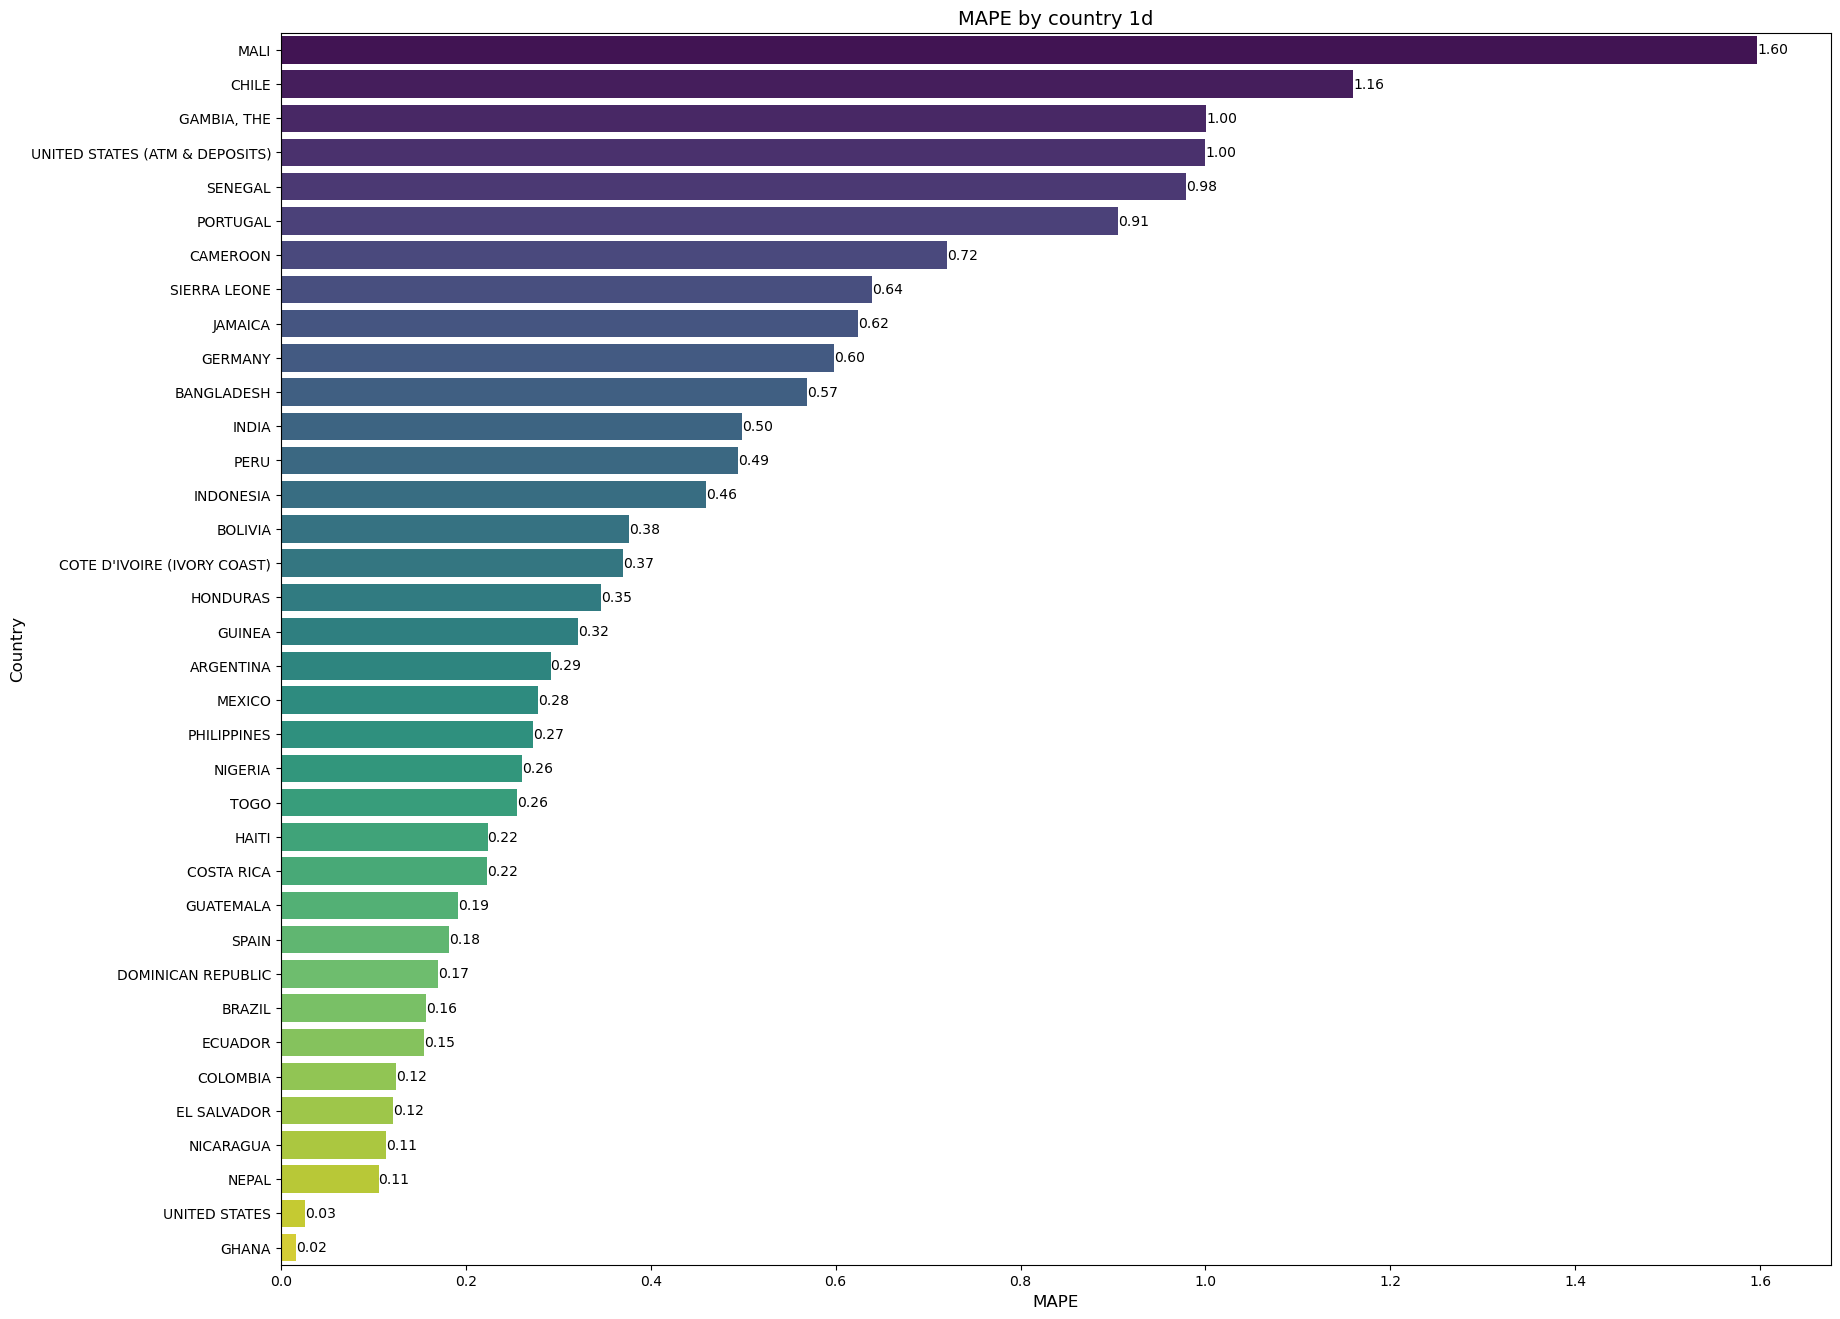

In [257]:
forecast_1d_country=forecast_1d_country.sort_values('pe', ascending=False)
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_1d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [258]:
##WAPE A 1 DÍA GENERAL##
forecast_1d["ae"] = abs((forecast_1d.amount - forecast_1d['mean']))
print(forecast_1d.ae.sum() / forecast_1d.amount.sum())

0.13793969459578526


In [ ]:
##WAPE POR PAÍSES##

In [259]:
wape_country_f1d = forecast_1d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


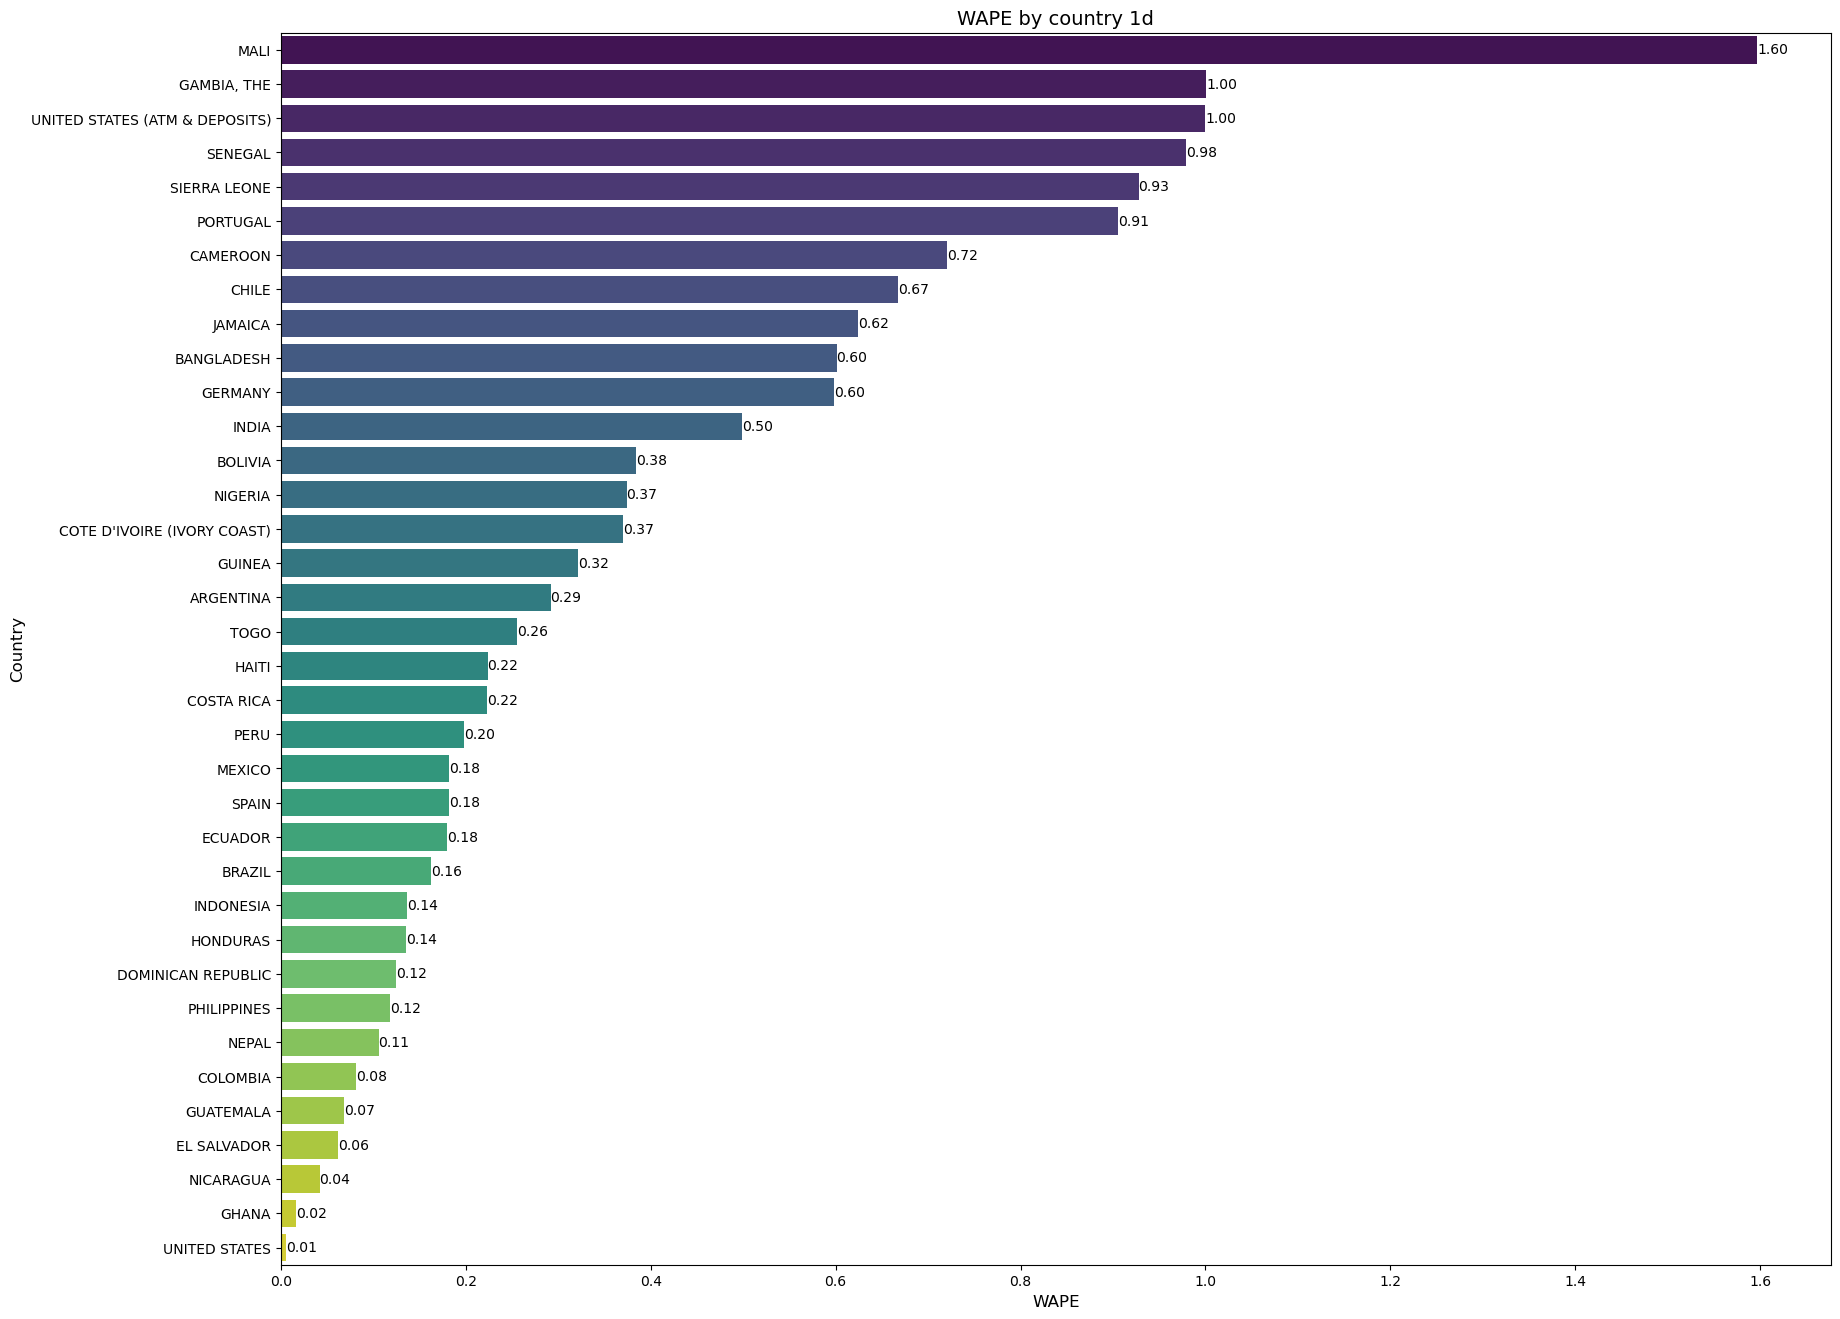

In [260]:
wape_country_f1d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f1d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()


In [261]:
##MAPE A 3 DIAS##
###MAPE FORECAST A 3 DÍAS##
forecast_3d=df_forecast_final.loc[df_forecast_final.date<='2023-09-13']

In [265]:
forecast_3d.sort_values('amount', ascending=False).head(10)

,payer,country,date,amount,p10,p50,p90,mean,payer_country
348,ELEKTRA (MEXICO),MEXICO,2023-09-11,8069372.31,8.872220e+06,9.456555e+06,1.003265e+07,9.452626e+06,ELEKTRA (MEXICO)_MEXICO
741,ELEKTRA (MEXICO),MEXICO,2023-09-12,6250790.48,7.078607e+06,7.640332e+06,8.340942e+06,7.651988e+06,ELEKTRA (MEXICO)_MEXICO
682,ELEKTRA (MEXICO),MEXICO,2023-09-13,5772592.34,6.555620e+06,7.138160e+06,7.719144e+06,7.161741e+06,ELEKTRA (MEXICO)_MEXICO
152,BANCOPPEL (APPRIZA),MEXICO,2023-09-11,4652243.12,5.156468e+06,5.623953e+06,5.954824e+06,5.584666e+06,BANCOPPEL (APPRIZA)_MEXICO
183,BANRURAL (RYT),GUATEMALA,2023-09-11,4334444.87,4.143648e+06,4.706376e+06,5.233092e+06,4.709053e+06,BANRURAL (RYT)_GUATEMALA
347,BANCOPPEL (APPRIZA),MEXICO,2023-09-12,3533554.54,4.212420e+06,4.626907e+06,4.986572e+06,4.639294e+06,BANCOPPEL (APPRIZA)_MEXICO
234,BANCOPPEL (APPRIZA),MEXICO,2023-09-13,3359530.21,3.989471e+06,4.350958e+06,4.771727e+06,4.362058e+06,BANCOPPEL (APPRIZA)_MEXICO
224,BANCO INDUSTRIAL,GUATEMALA,2023-09-11,3252755.85,3.017895e+06,3.418188e+06,3.787699e+06,3.414477e+06,BANCO INDUSTRIAL_GUATEMALA
713,BANRURAL (RYT),GUATEMALA,2023-09-12,3160073.79,3.188243e+06,3.614884e+06,4.180143e+06,3.623327e+06,BANRURAL (RYT)_GUATEMALA
772,BANRURAL (RYT),GUATEMALA,2023-09-13,2664805.30,2.644765e+06,3.063534e+06,3.539352e+06,3.060318e+06,BANRURAL (RYT)_GUATEMALA


In [266]:
forecast_3d.date.min(),forecast_3d.date.max()

(Timestamp('2023-09-11 00:00:00'), Timestamp('2023-09-13 00:00:00'))

In [267]:
##MAPE PROMEDIO A 3 D (para los que tienen MAPE definido)
forecast_3d["pe"] = abs((forecast_3d.amount - forecast_3d['mean']) / forecast_3d.amount)
forecast_3d.pe.mean()

/tmp/ipykernel_550/383919511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_3d["pe"] = abs((forecast_3d.amount - forecast_3d['mean']) / forecast_3d.amount)


0.7270978833481324

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


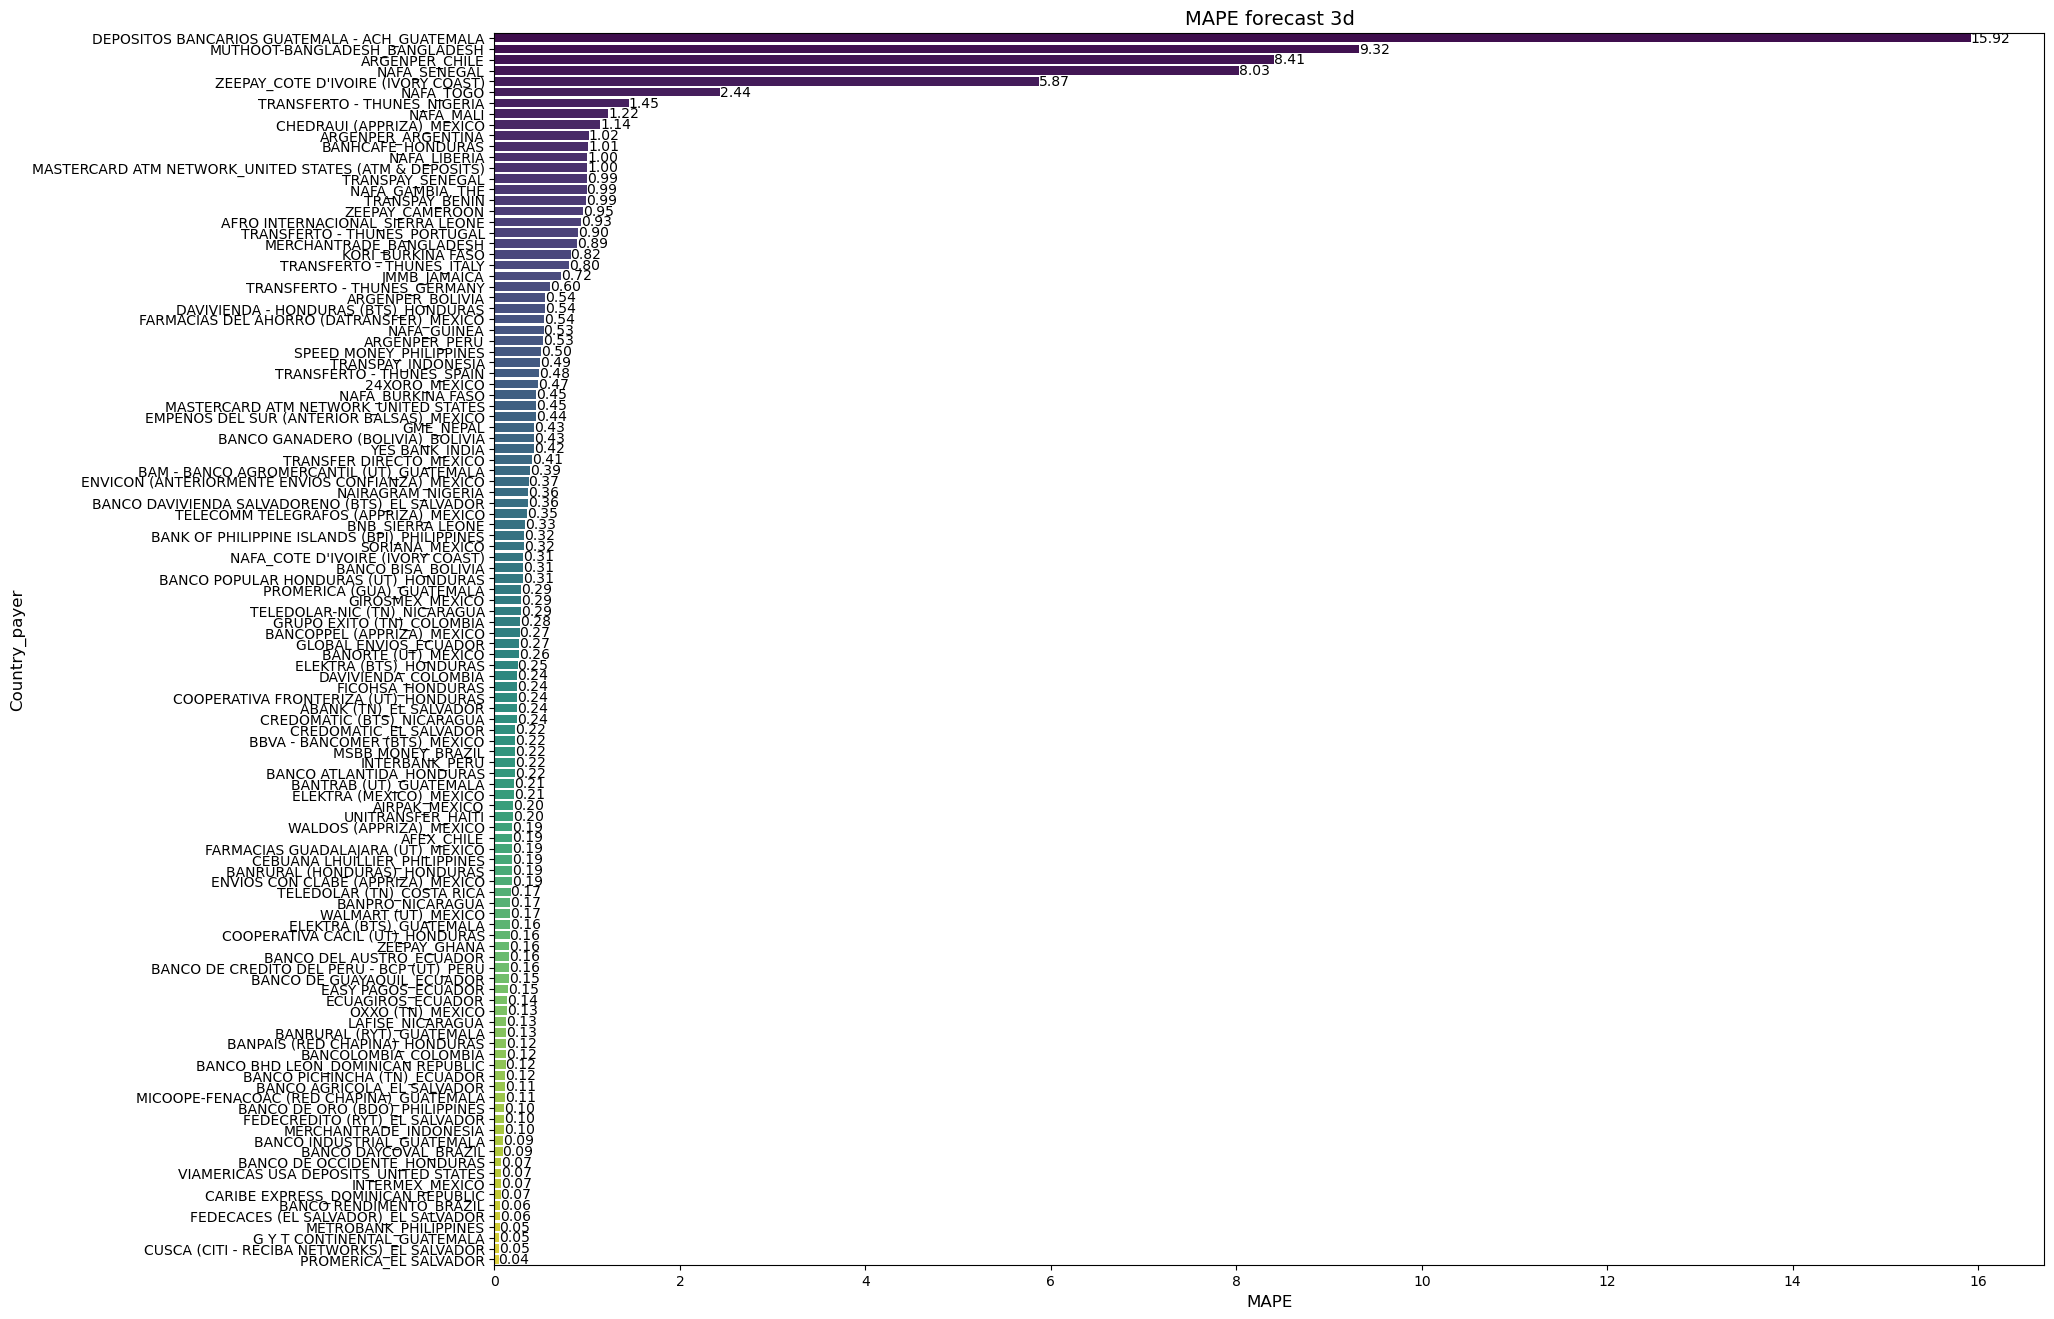

In [268]:
# Agrupar por 'payer_country' y calcular la suma de 'pe', luego ordenar por 'pe' de forma descendente
forecast_3d_payer_country = forecast_3d.groupby('payer_country')['pe'].mean().reset_index().sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_3d_payer_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE forecast 3d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_3d_payer_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [269]:
##FORECAST 3DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_3d_country = forecast_3d.groupby('country')['pe'].mean().reset_index()
forecast_3d_country=forecast_3d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


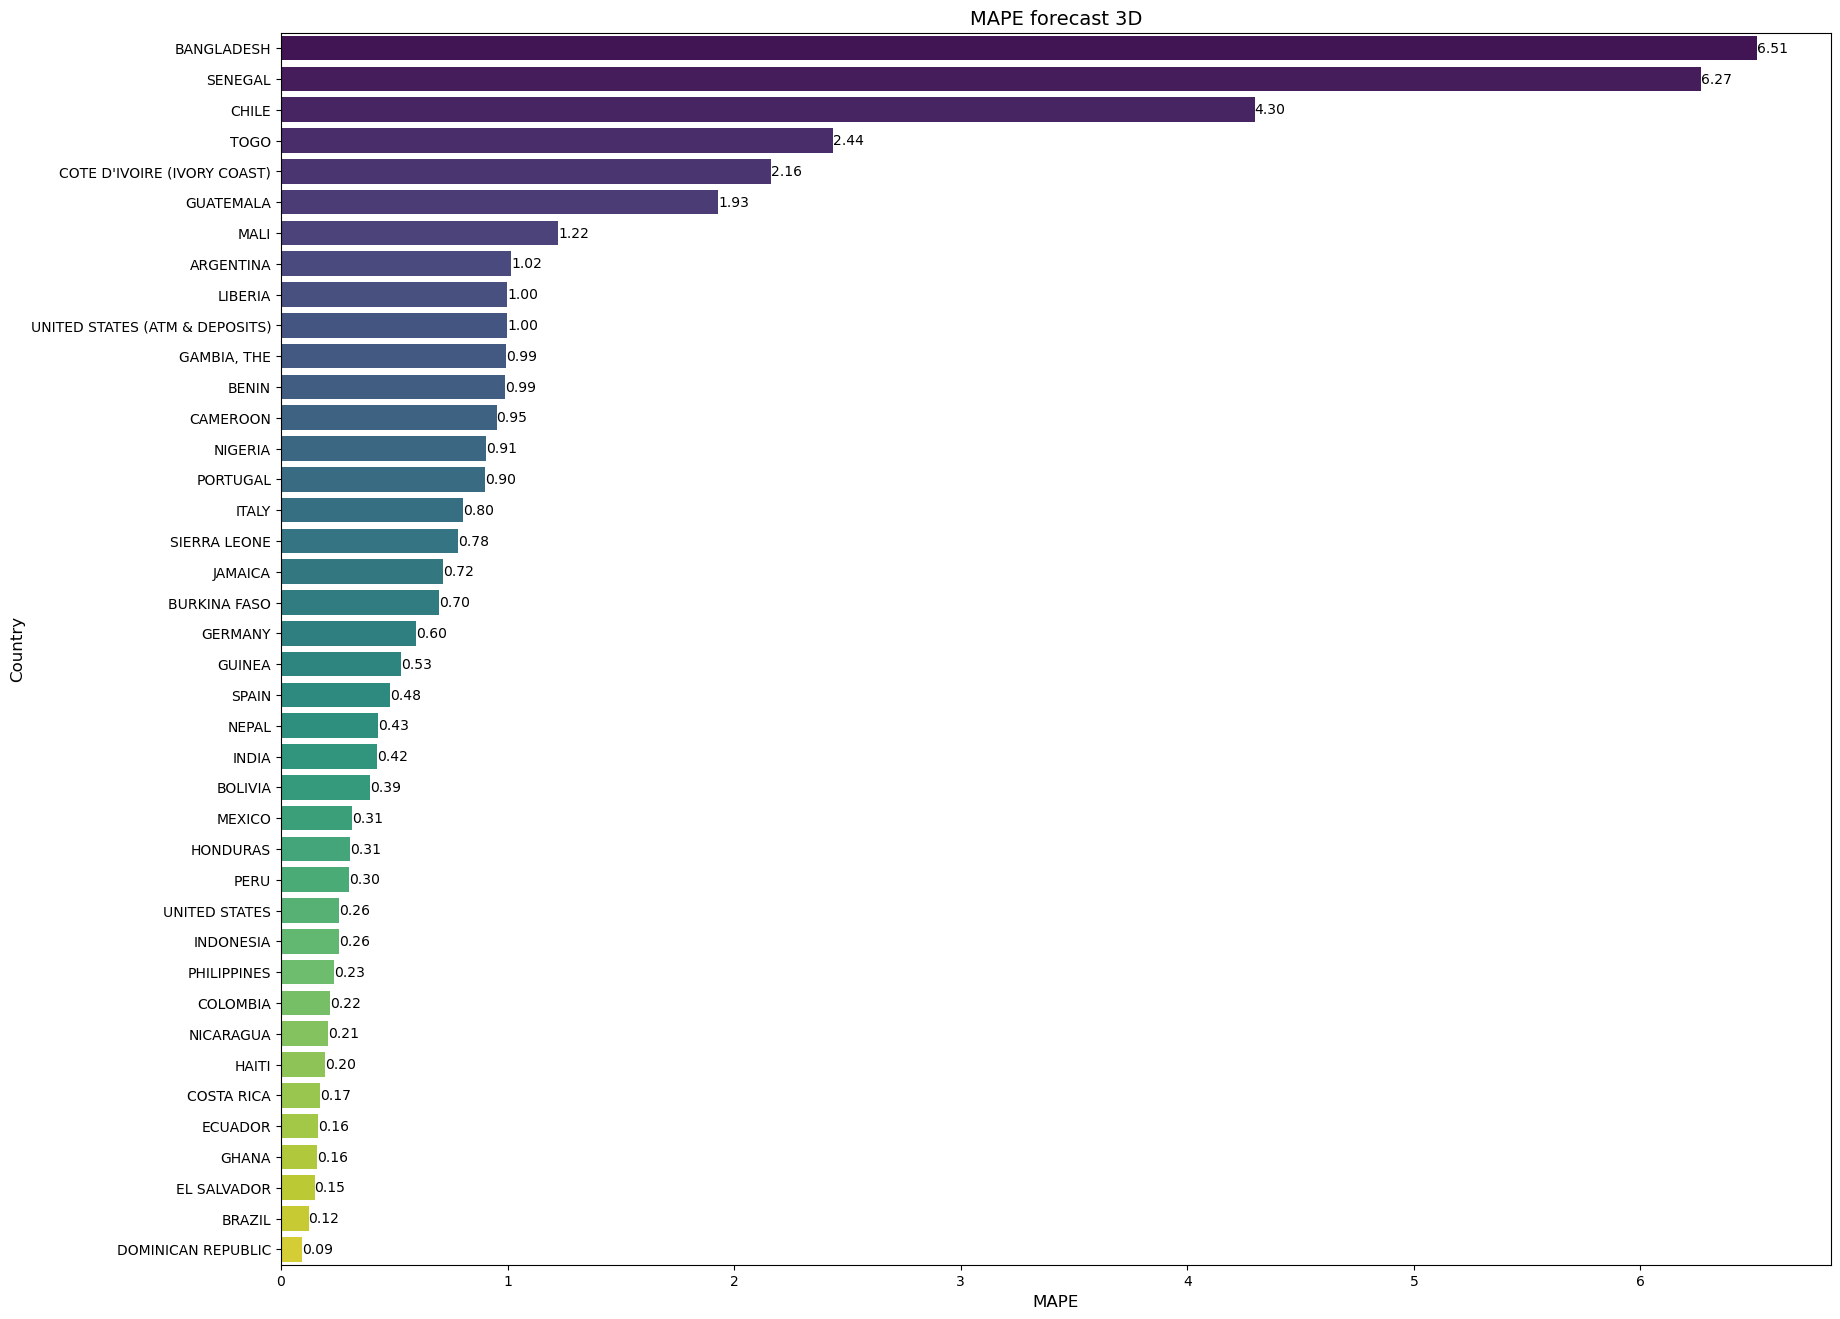

In [270]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_3d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE forecast 3D', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_3d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [271]:
##WAPE A 3 DÍAS GENERAL##
forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))
print(forecast_3d.ae.sum() / forecast_3d.amount.sum())

0.1724466791685904


/tmp/ipykernel_550/4007322800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))


In [ ]:
##WAPE POR PAÍSES 3d##

In [272]:
wape_country_f3d = forecast_3d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


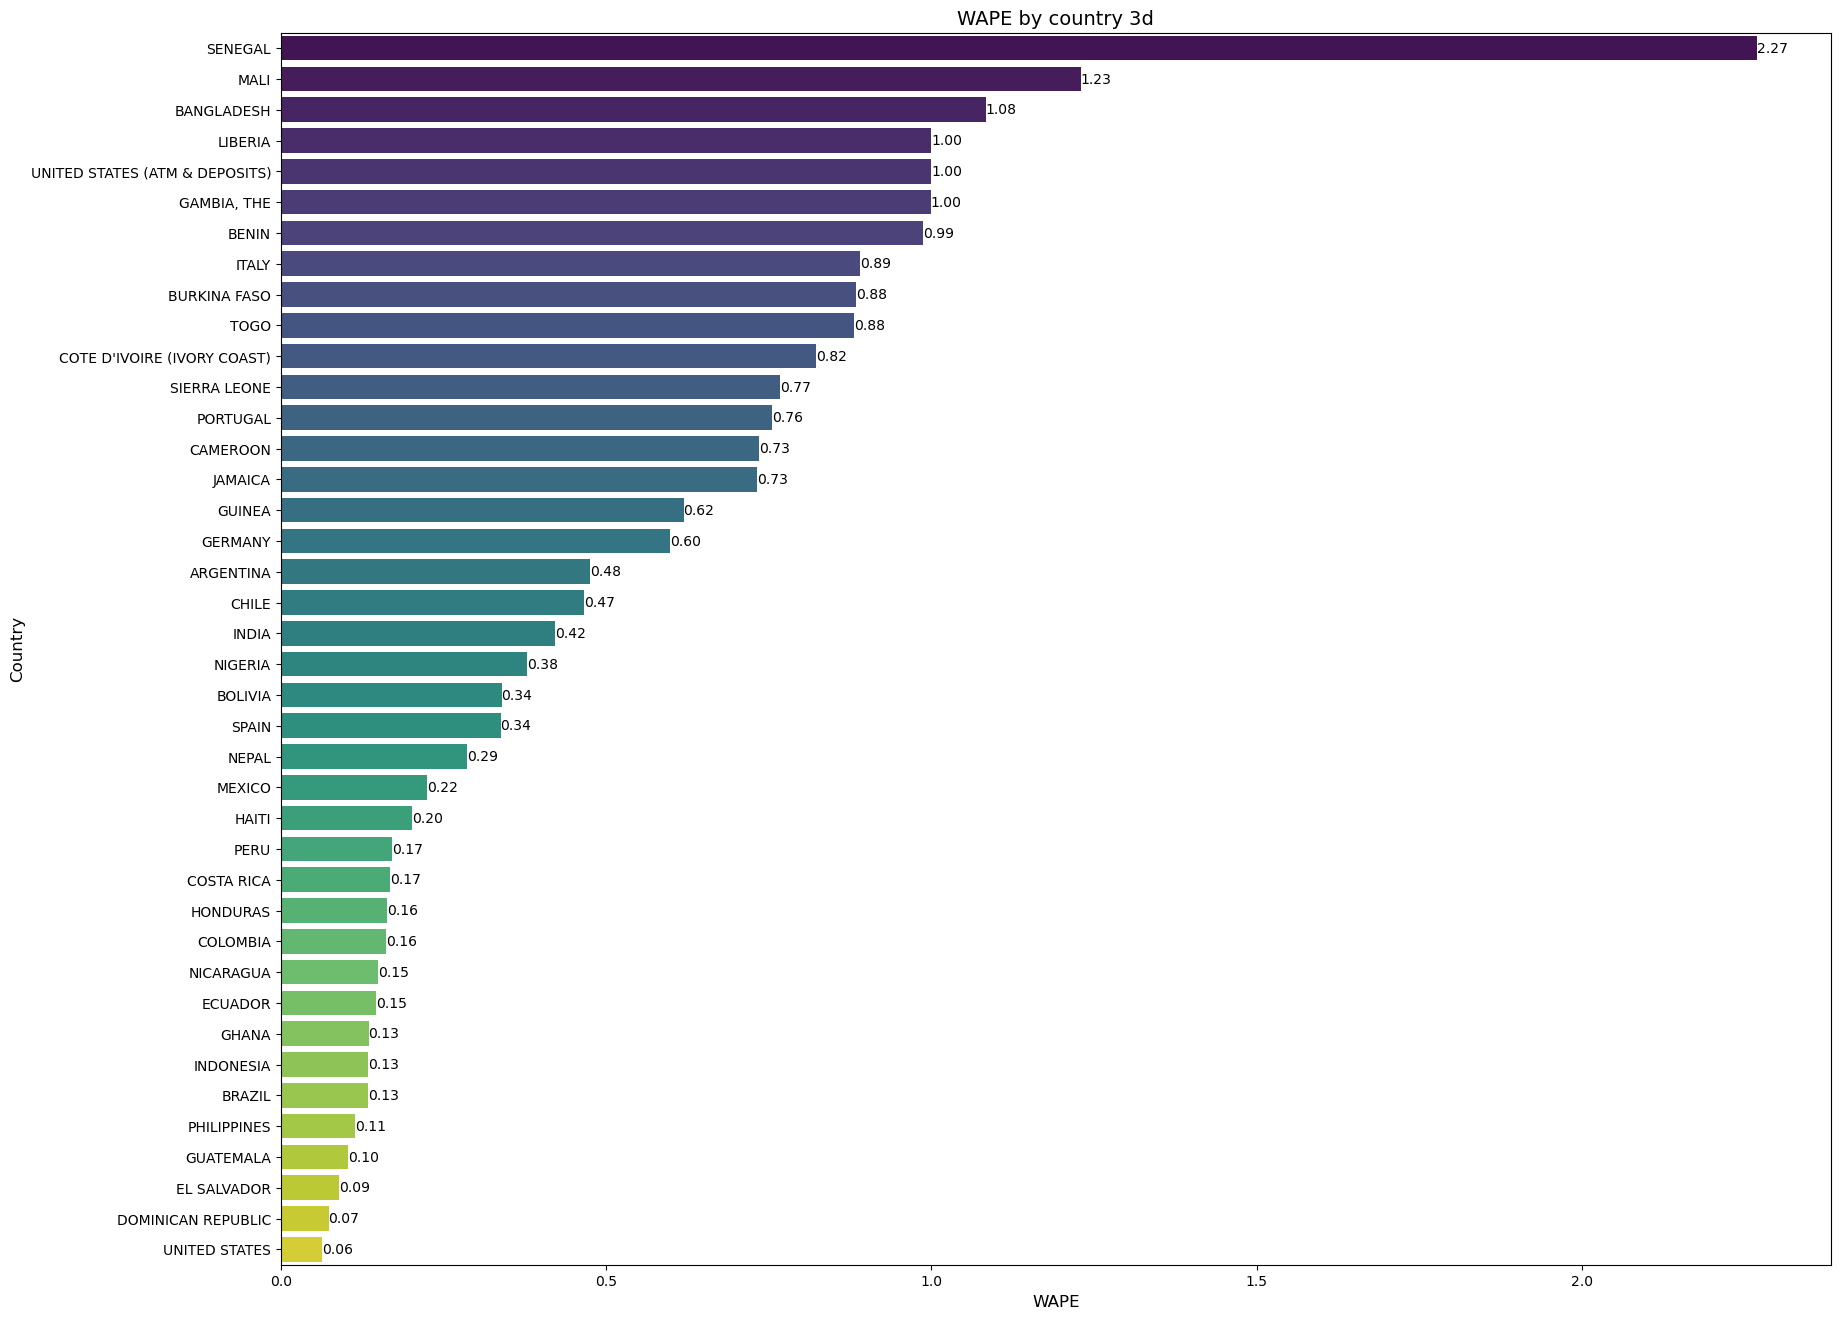

In [273]:
wape_country_f3d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f3d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 3d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f3d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [274]:
##MAPE A 7 DIAS##
###MAPE FORECAST 7 DÍAS##
forecast_7d=df_forecast_final

In [275]:
forecast_7d.shape

(722, 9)

In [276]:
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)

In [277]:
forecast_7d.date.min(),forecast_7d.date.max()

(Timestamp('2023-09-11 00:00:00'), Timestamp('2023-09-17 00:00:00'))

In [278]:
##MAPE PROMEDIO A 7 D (para los que tienen MAPE definido)
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)
forecast_7d.pe.mean()

0.5359404387185173

In [ ]:
##MAPE PROMEDIO A 7 DIAS POR PAYER

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


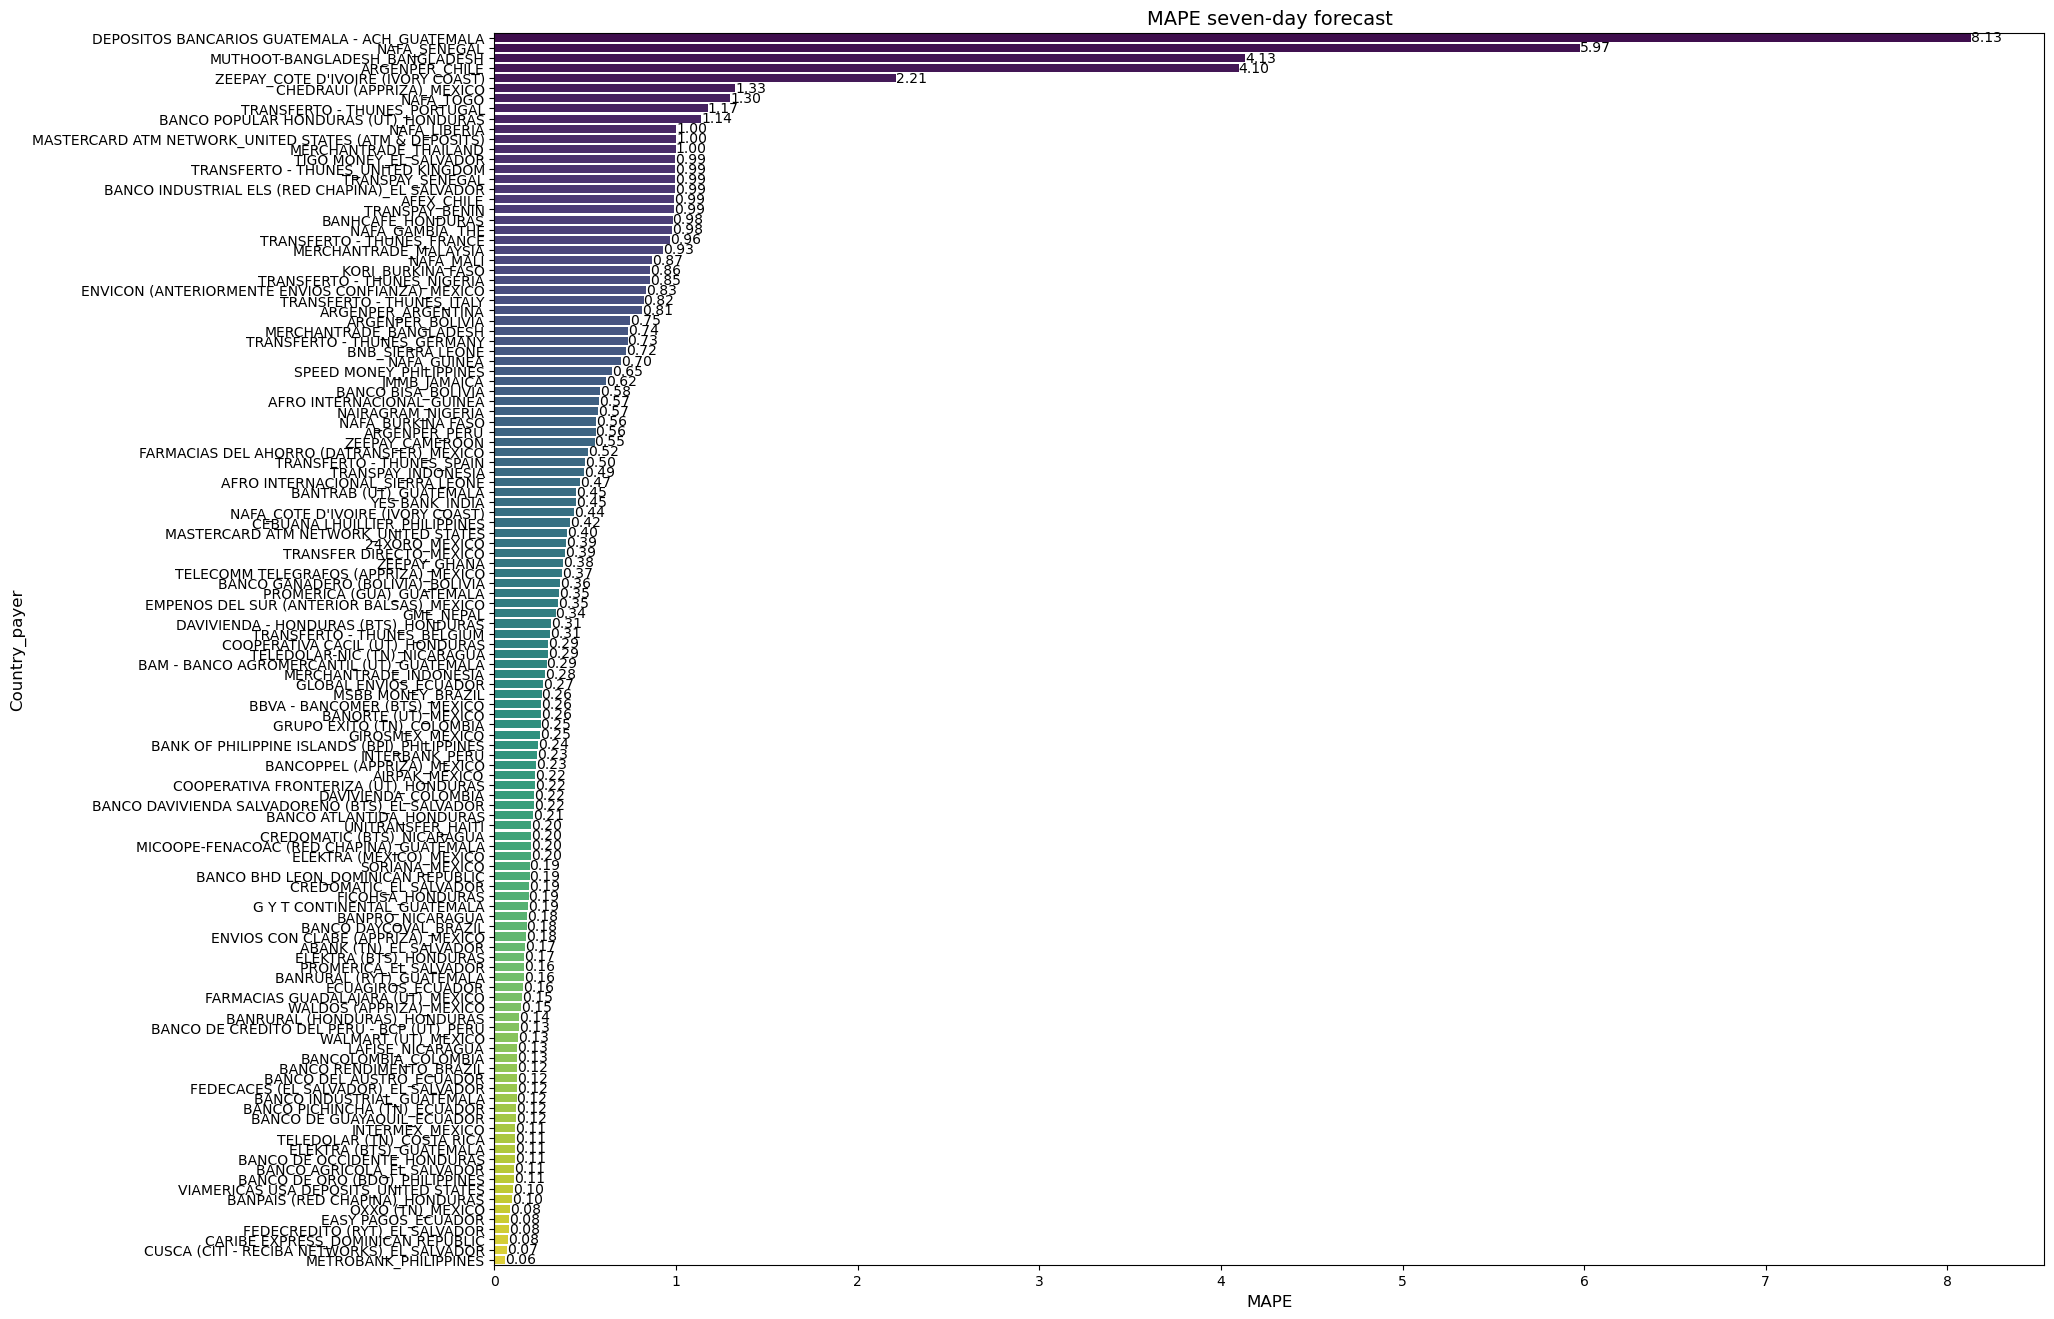

In [279]:
# Agrupar por 'payer_country' y calcular la suma de 'pe', luego ordenar por 'pe' de forma descendente
forecast_7d_payer_country = forecast_7d.groupby('payer_country')['pe'].mean().reset_index().sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_7d_payer_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE seven-day forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_payer_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [280]:
##FORECAST 7DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_7d_country = forecast_7d.groupby('country')['pe'].mean().reset_index()
forecast_7d_country=forecast_7d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


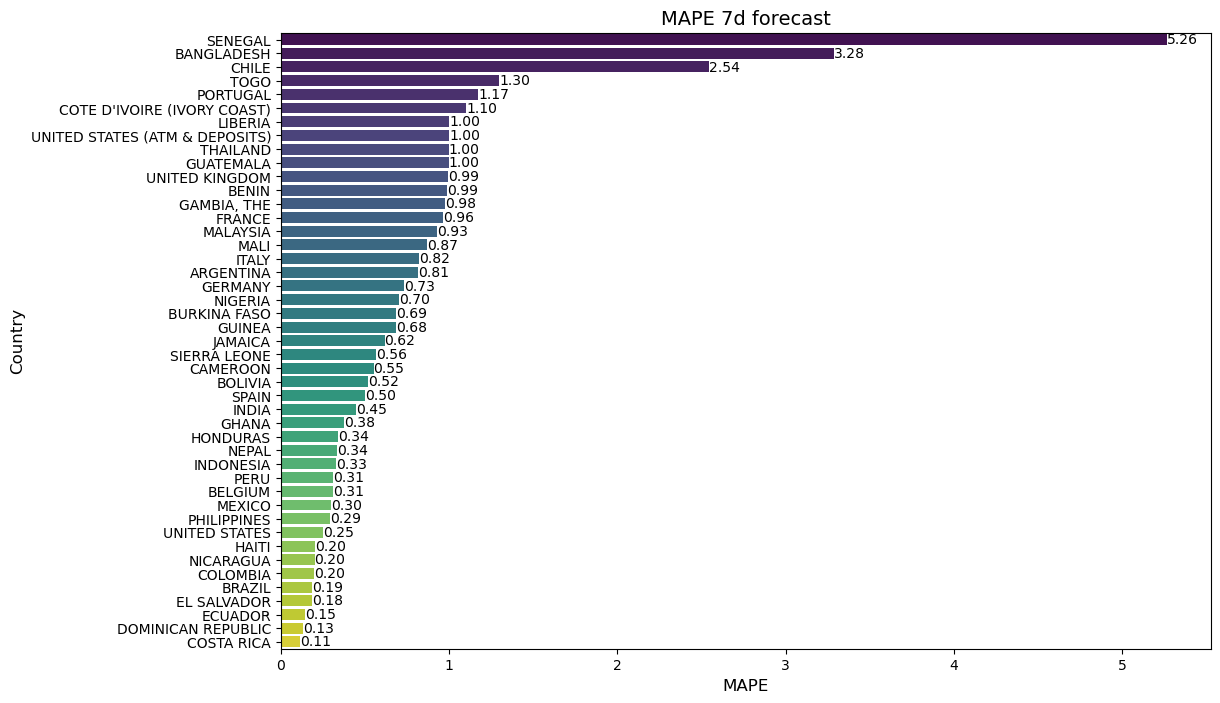

In [281]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_7d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE 7d forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [282]:
##WAPE A 7 DIAS GENERAL##
forecast_7d=df_forecast_final
forecast_7d["ae"] = abs((forecast_7d.amount - forecast_7d['mean']))
print(forecast_7d.ae.sum() / forecast_7d.amount.sum())

0.16319972754147616


In [ ]:
#WAPE POR PAISES A 7 DIAS

In [283]:
wape_country_f7d = forecast_7d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


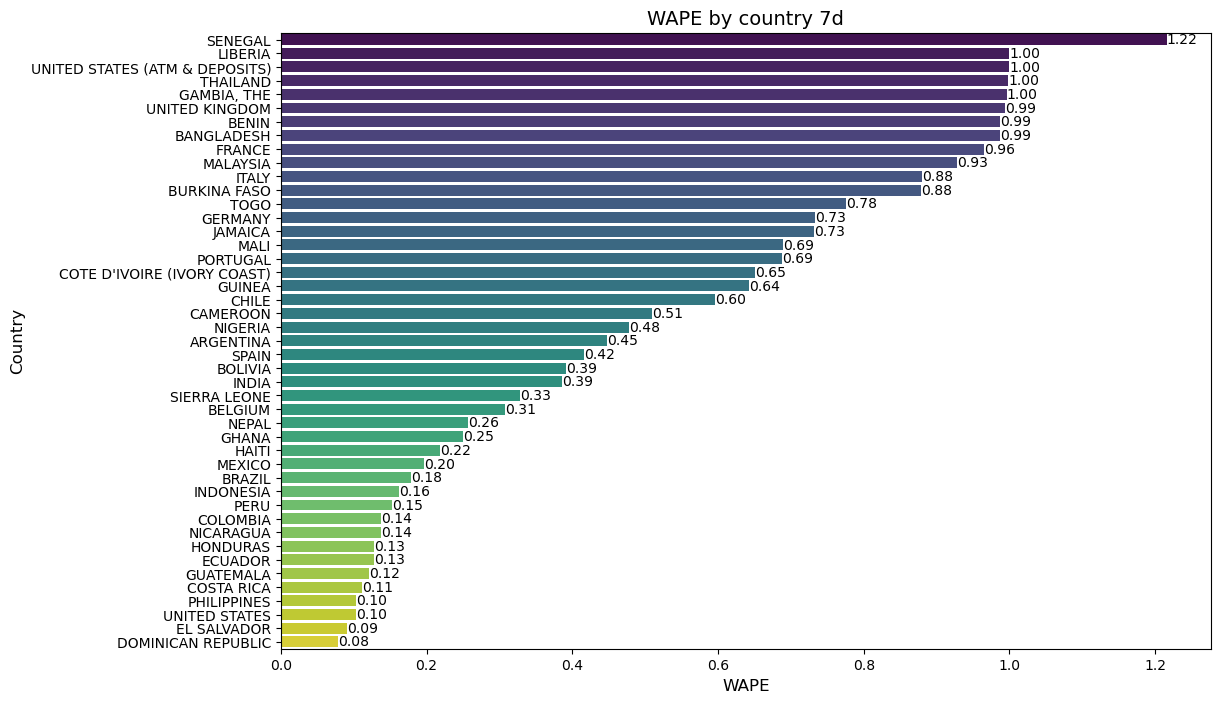

In [284]:
wape_country_f7d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f7d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 7d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f7d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()
